In [1]:
from crismy.crismy import CRISM
from crismy.utils import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_if218l_trr3.img'
hsp = CRISM.open(f)


<Figure size 2160x2880 with 0 Axes>

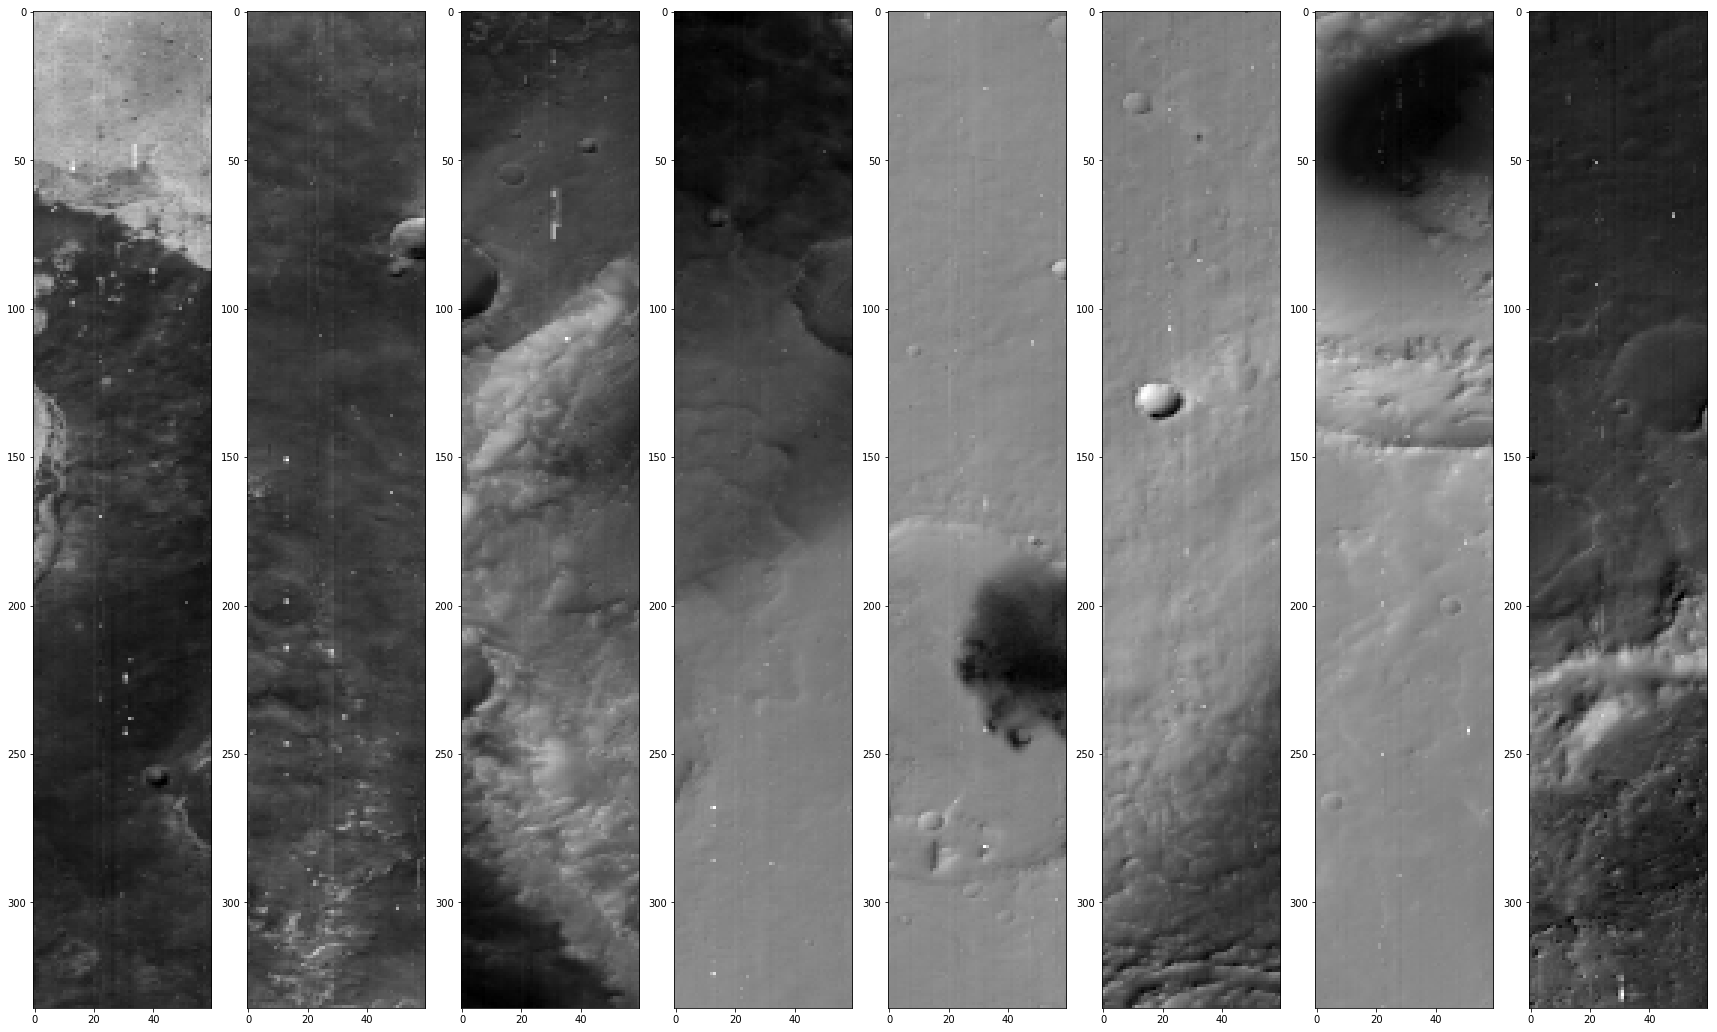

In [12]:
plt.figure(figsize=(30,40))
utils.view_hsp(hsp, 75, cols=8);

In [13]:
hsp.shape

(154, 2700, 64)

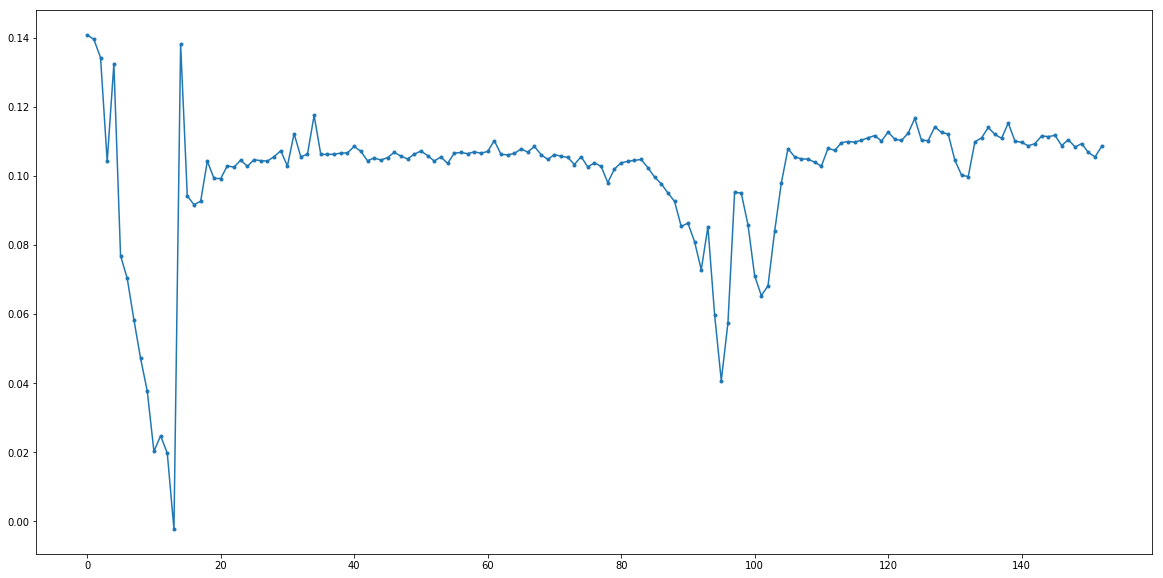

In [18]:
plt.figure(figsize=(20,10))
plt.plot(hsp[1:, 100, 30],'.-')

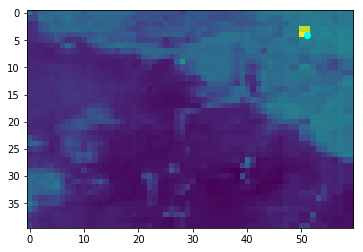

In [125]:
plt.imshow(hsp[100,60:100,0:100])
plt.scatter([51],[4], c='cyan')

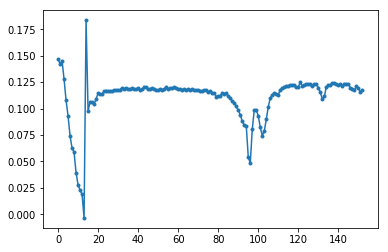

In [126]:
plt.plot(hsp[1:, 111, 4],'.-')

In [64]:
from scipy.signal import savgol_filter
import scipy.signal as signal

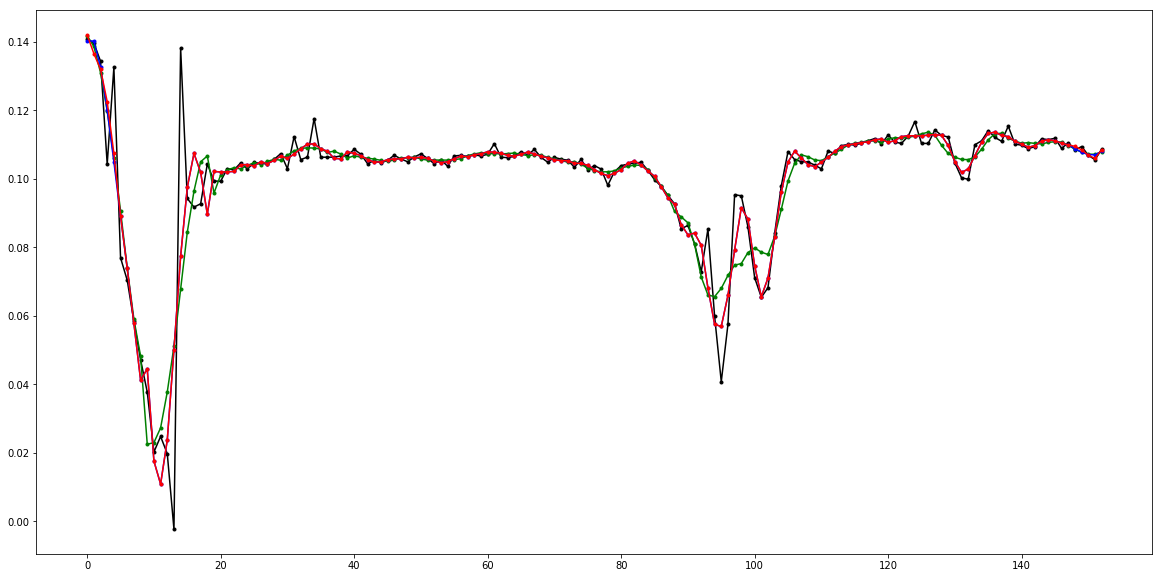

In [34]:
plt.figure(figsize=(20,10))
plt.plot(hsp[1:, 100, 30],'k.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 11, 3),'g.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 11, 4),'b.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 11, 5),'r.-')
#plt.plot(savgol_filter(hsp[1:, 100, 30], 9, 3),'r.-')
#plt.plot(savgol_filter(hsp[1:, 100, 30], 9, 4),'b.-')

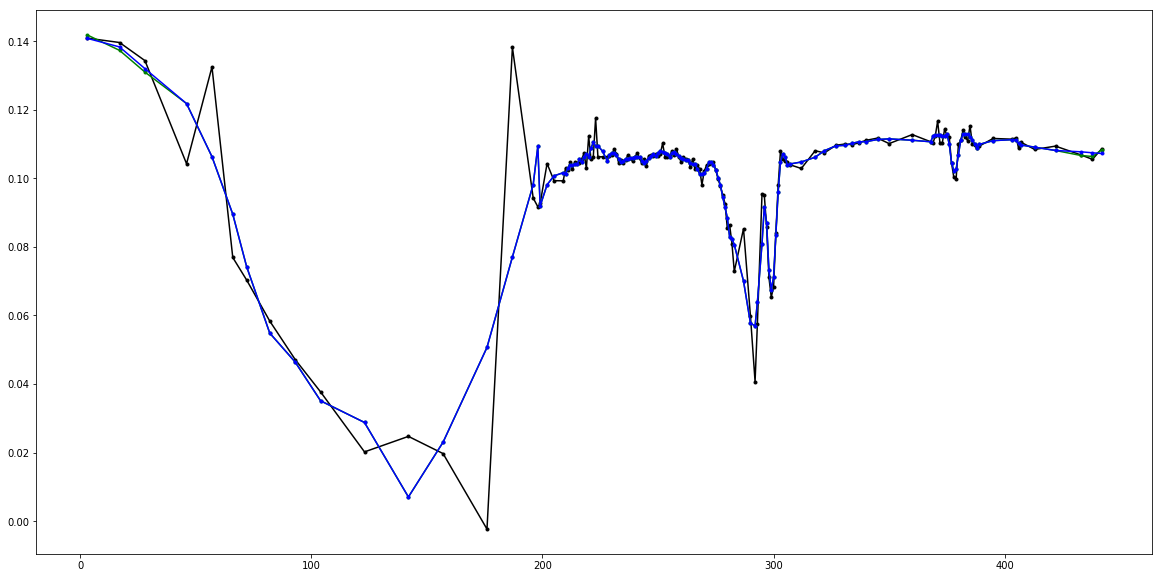

In [115]:
plt.figure(figsize=(20,10))
x= hsp.rownum_table[1:]
plt.plot(x,hsp[1:, 100, 30],'k.-')
plt.plot(x,savgol_filter(hsp[1:, 100, 30][::-1], 7, 3)[::-1],'g.-')
plt.plot(x,savgol_filter(hsp[1:, 100, 30], 7, 2),'b.-')

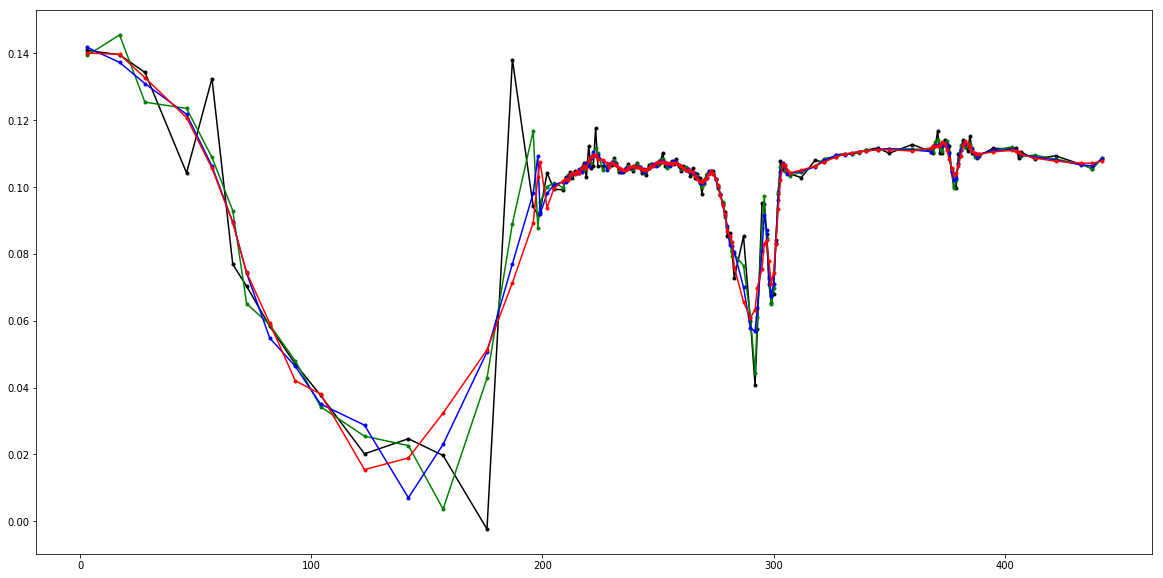

In [109]:
plt.figure(figsize=(20,10))
x= hsp.rownum_table[1:]
plt.plot(x,hsp[1:, 100, 30],'k.-')
plt.plot(x,savgol_filter(hsp[1:, 100, 30], 5, 3),'g.-')
plt.plot(x,savgol_filter(hsp[1:, 100, 30], 7, 3),'b.-')
plt.plot(x,savgol_filter(hsp[1:, 100, 30], 9, 3),'r.-')

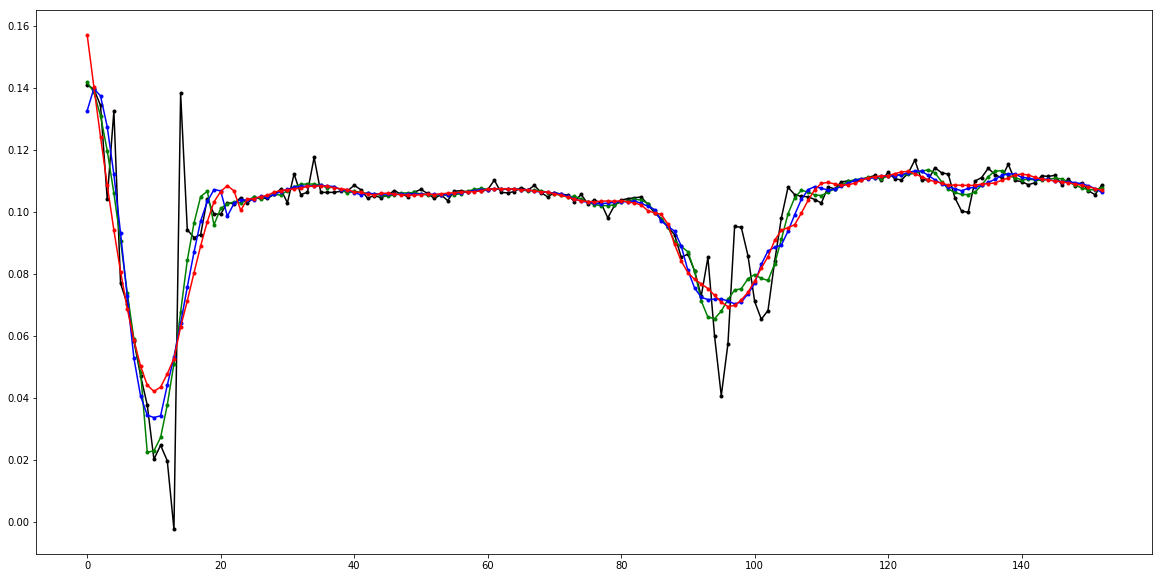

In [36]:
plt.figure(figsize=(20,10))
plt.plot(hsp[1:, 100, 30],'k.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 11, 3),'g.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 15, 3),'b.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 19, 3),'r.-')

In [41]:
plt.figure(figsize=(20,10))
plt.plot(hsp[1:, 100, 30],'k.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 11, 3),'g.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 19, 4),'b.-')
plt.plot(savgol_filter(hsp[1:, 100, 30], 31, 5),'r.-')

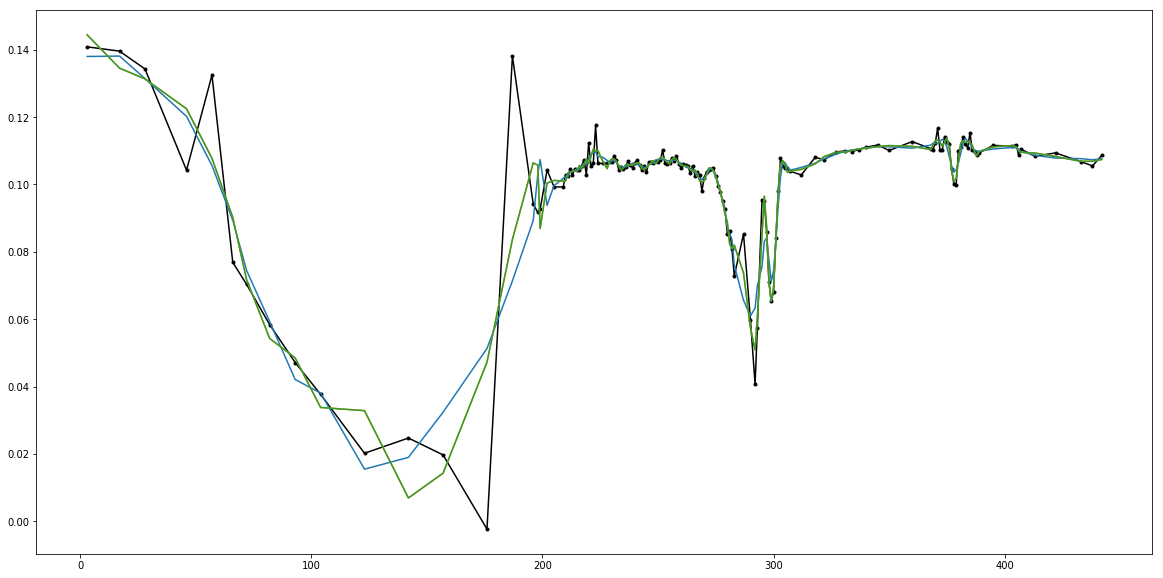

In [63]:
plt.figure(figsize=(20,10))
x= hsp.rownum_table[1:]
plt.plot(x, hsp[1:, 100, 30], 'k.-')
plt.plot(x, savgol_filter(hsp[1:, 100, 30], 9, 3, mode='nearest'))
plt.plot(x, savgol_filter(hsp[1:, 100, 30], 9, 4, mode='nearest'))
plt.plot(x, savgol_filter(hsp[1:, 100, 30], 9, 5, mode='nearest'))

In [77]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.82805e-75): result may not be accurate.
  overwrite_a=True).T


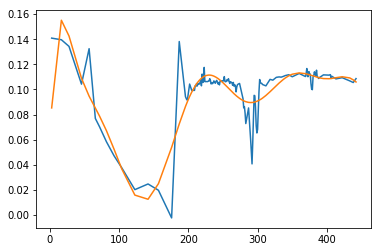

In [107]:
model = make_pipeline(PolynomialFeatures(14), Ridge(fit_intercept=False, normalize=True, ))
model.fit(x[:, np.newaxis],hsp[1:, 100, 30])
plt.plot(x,hsp[1:, 100, 30])
plt.plot(x,model.predict(x[:, np.newaxis]))